In [1]:
%matplotlib inline


# N170 Load and Visualize Data

This example demonstrates loading, organizing, and visualizing ERP response data from the visual N170 experiment. 

Images of faces and houses are shown in a rapid serial visual presentation (RSVP) stream.

The data used is the first subject and first session of the one of the eeg-notebooks N170 example datasets, recorded using the InteraXon MUSE EEG headset (2016 model). 
This session consists of six two-minute blocks of continuous recording.  

We first use the `fetch_datasets` to obtain a list of filenames. If these files are not already present 
in the specified data directory, they will be quickly downloaded from the cloud. 

After loading the data, we place it in an MNE `Epochs` object, and obtain the trial-averaged response. 

The final figure plotted at the end shows the N170 response ERP waveform. 


## Setup



In [2]:
# Some standard pythonic imports
import os
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

# MNE functions
from mne import Epochs,find_events

# EEG-Notebooks functions
from eegnb.analysis.utils import load_data,plot_conditions
from eegnb.datasets import fetch_dataset

## Load Data

We will use the eeg-notebooks N170 example dataset

Note that if you are running this locally, the following cell will download
the example dataset, if you do not already have it.




In [3]:
experiment_name = 'Summer_School_N170'
eegnb_data_path = os.path.join(os.path.expanduser('~/'),'.eegnb', 'data')    
n170_data_path = os.path.join(eegnb_data_path, experiment_name, 'local')

subject = 8
session = 1
raw = load_data(subject,session,
                experiment=experiment_name, site='local', device_name='muse2_bfn',
                data_dir = eegnb_data_path)

/Users/xue/.eegnb/data


Loading these files: 

/Users/xue/.eegnb/data/Summer_School_N170/local/muse2_bfn/subject0008/session001/recording_2023-06-26-20.26.01.csv




['TP9', 'Fp1', 'Fp2', 'TP10', 'stim']
['TP9', 'Fp1', 'Fp2', 'TP10', 'stim']
Creating RawArray with float64 data, n_channels=5, n_times=15496
    Range : 0 ... 15495 =      0.000 ...    60.527 secs
Ready.


## Visualize the power spectrum



Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


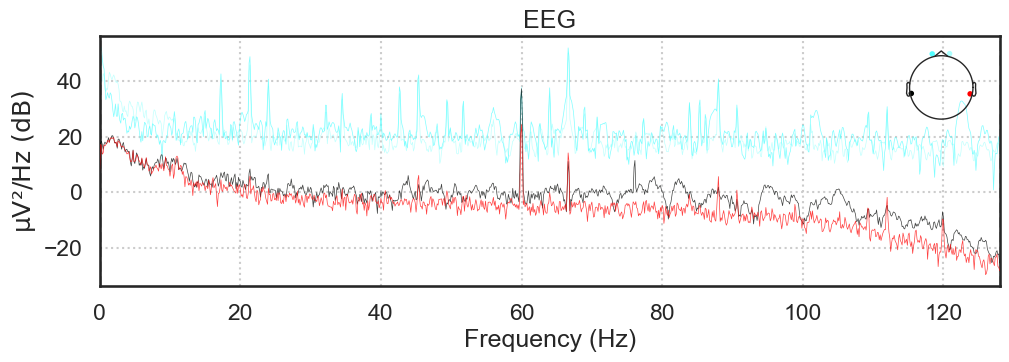

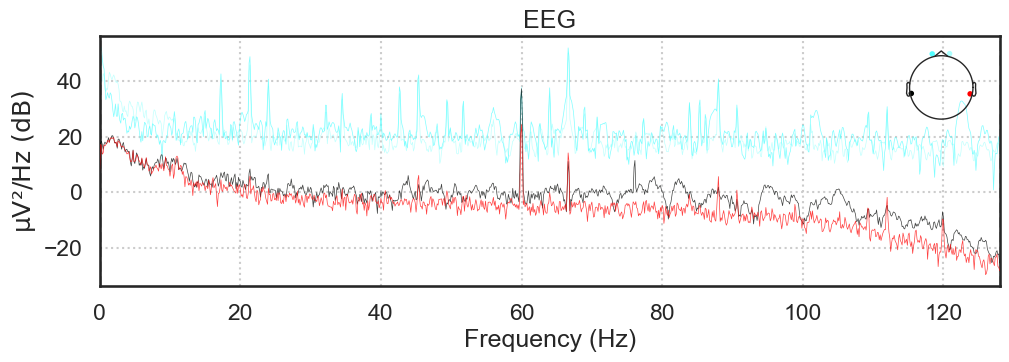

In [4]:
raw.plot_psd()

## Filtering



Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


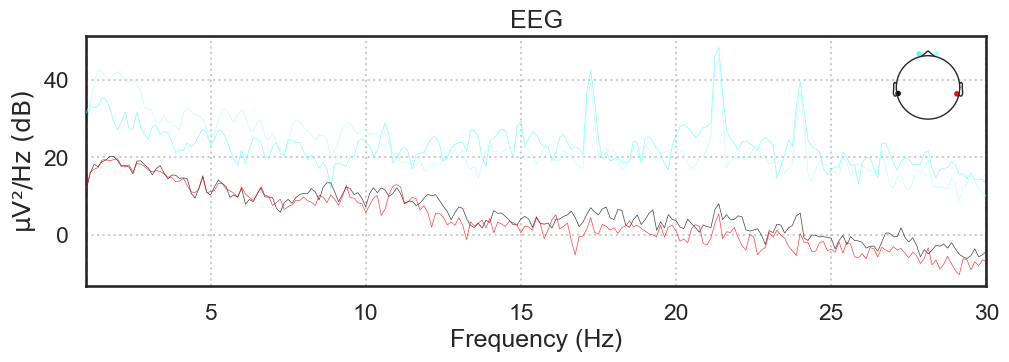

In [5]:
raw.filter(1,30, method='iir')
raw.plot_psd(fmin=1, fmax=30);

## Epoching



In [6]:
# Create an array containing the timestamps and type of each stimulus (i.e. face or house)
events = find_events(raw)
event_id = {'Face': 1, 'House': 2}

# Create an MNE Epochs object representing all the epochs around stimulus presentation
epochs = Epochs(raw, events=events, event_id=event_id, 
                tmin=-0.1, tmax=0.6, baseline=None,
                reject={'eeg': 5e-3}, preload=True, 
                verbose=True, picks=[0,1,2,3])
print('sample drop %: ', (1 - len(epochs.events)/len(events)) * 100)
epochs

75 events found
Event IDs: [1 2]
Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 75 events and 181 original time points ...
1 bad epochs dropped
sample drop %:  1.3333333333333308


Number of events,74
Events,Face: 35House: 39
Time range,-0.102 – 0.602 sec
Baseline,off


## Epoch average



In [7]:
%matplotlib inline

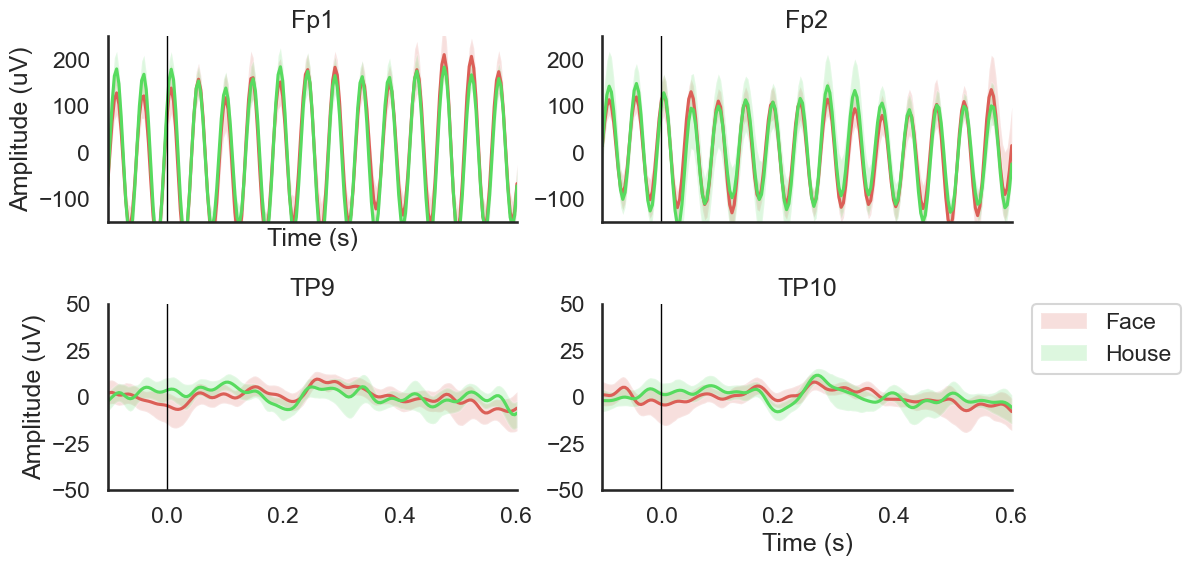

In [8]:
conditions = OrderedDict()
conditions['Face'] = [1]
conditions['House'] = [2]

fig, ax = plot_conditions(epochs, conditions=conditions, 
                          ci=97.5, n_boot=1000, title='',
                          diff_waveform=None, #(1, 2))
                          channel_order=[1,0,2,3]) # reordering of epochs.ch_names according to [[0,2],[1,3]] of subplot axes

# Manually adjust the ylims
for i in [0,2]: ax[i].set_ylim([-150,250])
for i in [1,3]: ax[i].set_ylim([-50,50])